In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Visualize predicted results

In [221]:
df_before=pd.read_csv('hybrid_ner_model_0.csv')
df_after=pd.read_csv('hybrid_ner_model_1.csv')

In [222]:
df_before.drop(['Unnamed: 0'],axis=1,inplace=True)

In [223]:
df_after.drop(['Unnamed: 0'],axis=1,inplace=True)

In [224]:
df_before

,RESUME PDF,NAME,EMAIL ADDRESS,PHONE NUMBER,COLLEGE NAME,DEGREE,SKILLS,DESIGNATION,YEAR,COMPANY,SCORES
0,['Abiral_Pandey_Fullstack_Java.pdf'],['Abiral Pandey'],['abiral.pandey88@gmail.com'],['940-242-3303'],['University of North Texas'],"['US Citizen', 'e-Commerce', 'Bachelor of Comp...","['design patterns', 'script', 'node js', 'ecli...","['business objects', 'java developer', 'softwa...","[2016, 2000, 2005, 2008, 2012, 2013, 2014, 2015]","['IBM', 'Toll Brothers', 'HP', 'Microsoft', 'H...",['70.8183%']
1,['Harshitha Challa.pdf'],['Harshitha'],['harshithac511@gmail.com'],['650-517-6475'],[],"['Full Stack Java Developer', 'Bachelor’s in E...","['design patterns', 'script', 'eclipse', 'coll...","['full stack developer', 'business objects', '...",[],"['APA', 'IBM', 'Splunk', 'USAA', 'Symphony', '...",['71.5106%']
2,['Adelina_Erimia_PMP1.pdf'],['Adelina Erimia'],['erimia@msn.com'],['469-331-7851'],['The George Washington University School of B...,"['BA - Business and Management', 'PMI-Certifie...","['ppm', 'com', 'problem management', 'agile', ...","['green belt', 'project management', 'business...","[2016, 2018, 2002, 2008, 2009, 2011, 2012, 2015]","['Microsoft', 'Six Sigma Green Belt, SMC', 'Un...",['6.5494%']
3,['Jagan S Iyer PM.pdf'],['Jagan S Iyer'],['jagansrconsult@gmail.com'],[],"['MSUniversity of Madras', 'MS Central Michiga...","['Master of Science in Physics', 'Master of Sc...","['innovative', 'management team', 'banking', '...","['project management', 'account manager', 'sen...","['2005', 1994, 1980, 1996, 1998, 2003, 2004, 2...","['ITI', 'Snap', 'General Motors', 'Humana', 'A...",['16.8522%']
4,['mohid_rj.pdf'],['Mohid'],['mohid0089300@gmail.com'],['857-228-4961'],[],[],"['design patterns', 'web technologies', 'eclip...","['business objects', 'java developer', 'system...",[2005],"['IBM', 'ATI', 'PPL', 'Oracle', 'Nordstrom', '...",['69.7124%']


In [225]:
df_after

,RESUME PDF,NAME,EMAIL ADDRESS,PHONE NUMBER,COLLEGE NAME,DEGREE,SKILLS,DESIGNATION,YEAR,COMPANY,SCORES
0,['Abiral_Pandey_Fullstack_Java.pdf'],['Abiral Pandey'],[],[],['University North Texas'],['Bachelor Computer Science'],"['design patterns', 'script', 'node js', 'ecli...","['java developer', 'software engineer', 'web d...",[],"['IBM', 'HP', 'Microsoft', 'Toll Brothers', 'H...",['70.7564%']
1,['Harshitha Challa.pdf'],['Harshitha Email'],[],[],['JNTUH'],['Bachelor ’ Electronics Communication Enginee...,"['design patterns', 'script', 'eclipse', 'coll...","['full stack developer', 'business objects', '...",[],"['APA', 'IBM', 'Splunk', 'USAA', 'Symphony', '...",['70.2592%']
2,['Adelina_Erimia_PMP1.pdf'],['Adelina Erimia'],[],[],['The George Washington University School Busi...,['BA - Business Management PMI-Certified Proje...,"['ppm', 'com', 'msn', 'problem management', 'a...","['green belt', 'project management', 'support ...",[],"['Microsoft', 'Six Sigma Green Belt', 'UnitedH...",['7.5494%']
3,['Jagan S Iyer PM.pdf'],['Jagan S Iyer'],[],[],['MS Central Michigan University'],[],"['innovative', 'management team', 'banking', '...","['project management', 'account manager', 'sen...",[],"['ITI', 'Snap', 'General Motors', 'Humana', 'A...",['16.8522%']
4,['mohid_rj.pdf'],['Mohid Phone'],['mohid0089300'],[],[],[],"['design patterns', 'business object', 'eclips...","['java developer', 'systems analyst', 'system ...",[],"['IBM', 'ATI', 'PPL', 'Oracle', 'Nordstrom', '...",['76.4458%']


### Before preprocessing Nan

In [226]:
def count_nan(col_name:str,df:object):
    count=0
    lst=df[col_name.upper()]
    for record in lst:
        if record=='[]':
            count+=1
    return count

In [227]:
nan_list=[]
for col_name in df_before.columns:
    nan_list.append(count_nan(col_name,df_before))
    print(f'Column - {col_name:15} has total {count_nan(col_name,df_before):2} null value(s).')

Column - RESUME PDF      has total  0 null value(s).
Column - NAME            has total  0 null value(s).
Column - EMAIL ADDRESS   has total  0 null value(s).
Column - PHONE NUMBER    has total  1 null value(s).
Column - COLLEGE NAME    has total  2 null value(s).
Column - DEGREE          has total  1 null value(s).
Column - SKILLS          has total  0 null value(s).
Column - DESIGNATION     has total  0 null value(s).
Column - YEAR            has total  1 null value(s).
Column - COMPANY         has total  0 null value(s).
Column - SCORES          has total  0 null value(s).


In [228]:
df_nan_before=pd.DataFrame(nan_list,columns=['Nan count'],index=df_before.columns)
df_nan_before['Nan count'].sort_values()

RESUME PDF       0
NAME             0
EMAIL ADDRESS    0
SKILLS           0
DESIGNATION      0
COMPANY          0
SCORES           0
PHONE NUMBER     1
DEGREE           1
YEAR             1
COLLEGE NAME     2
Name: Nan count, dtype: int64

### After preprocessing Nan

In [229]:
nan_list=[]
col_name=df_after.columns
for col_name in df_after.columns:
    count=count_nan(col_name,df_after)
    nan_list.append(count)
    print(f'Column - {col_name:15} has total {count:2} null value(s).')

Column - RESUME PDF      has total  0 null value(s).
Column - NAME            has total  0 null value(s).
Column - EMAIL ADDRESS   has total  4 null value(s).
Column - PHONE NUMBER    has total  5 null value(s).
Column - COLLEGE NAME    has total  1 null value(s).
Column - DEGREE          has total  2 null value(s).
Column - SKILLS          has total  0 null value(s).
Column - DESIGNATION     has total  0 null value(s).
Column - YEAR            has total  5 null value(s).
Column - COMPANY         has total  0 null value(s).
Column - SCORES          has total  0 null value(s).


In [230]:
df_nan_after=pd.DataFrame(nan_list,columns=['Nan count'],index=df_after.columns)
df_nan_after['Nan count'].sort_values()

RESUME PDF       0
NAME             0
SKILLS           0
DESIGNATION      0
COMPANY          0
SCORES           0
COLLEGE NAME     1
DEGREE           2
EMAIL ADDRESS    4
PHONE NUMBER     5
YEAR             5
Name: Nan count, dtype: int64

In [231]:
df_nan_after

,Nan count
RESUME PDF,0
NAME,0
EMAIL ADDRESS,4
PHONE NUMBER,5
COLLEGE NAME,1
DEGREE,2
SKILLS,0
DESIGNATION,0
YEAR,5
COMPANY,0


In [232]:
df_nan=pd.DataFrame(data=df_nan_before['Nan count'].tolist(),columns=['Before Preprocessing Nan count'],index=df_after.columns)
df_nan.insert(1,'After Preprocessing Nan count',df_nan_after['Nan count'].tolist(),True)
df_total_nan=pd.DataFrame({'Before Preprocessing Nan count':[sum(df_nan_before['Nan count'].tolist())],
              'After Preprocessing Nan count':[sum(df_nan_after['Nan count'].tolist())]},index=['Total Nan count'])
df_nan.append(df_total_nan)

C:\Users\User\AppData\Local\Temp\ipykernel_19036\1657183887.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nan.append(df_total_nan)


,Before Preprocessing Nan count,After Preprocessing Nan count
RESUME PDF,0,0
NAME,0,0
EMAIL ADDRESS,0,4
PHONE NUMBER,1,5
COLLEGE NAME,2,1
DEGREE,1,2
SKILLS,0,0
DESIGNATION,0,0
YEAR,1,5
COMPANY,0,0


In [233]:
df_nan.T

,RESUME PDF,NAME,EMAIL ADDRESS,PHONE NUMBER,COLLEGE NAME,DEGREE,SKILLS,DESIGNATION,YEAR,COMPANY,SCORES
Before Preprocessing Nan count,0,0,0,1,2,1,0,0,1,0,0
After Preprocessing Nan count,0,0,4,5,1,2,0,0,5,0,0


In [265]:
df=df_before

# NER Candidates Summary

In [294]:
candidate_names=[name[2:-2] for name in df_before['NAME']]
print(f'Available candidate names :{candidate_names}')

print('==================================')
print('  No.    Candidate Names')
print('==================================')
for idx,name in enumerate(candidate_names):
    #print(idx+1,'-',name)
    print(f'{idx+1:3}.  -  {name:10}')
    
try:
    search_no=int(input('\nEnter the No. of the candidate you want to search for summary >> '))
except:
    print('Invalid input!')

if search_no>=1 and search_no<=len(candidate_names):
    #Retrieve candidate records if the search_no is valid
    record=df.iloc[search_no-1]
    print('\n=================================================')
    print('    ',record['NAME'][2:-2],"' NER SUMMARY")
    print('=================================================')
    print('Email Address  :',record['EMAIL ADDRESS'][2:-2],'\n')
    print('Phone No       :',record['PHONE NUMBER'][2:-2],'\n')
    print('College Name   :',record['COLLEGE NAME'][2:-2],'\n')
    print('Degree         :',record['DEGREE'][2:-2],'\n')
    print('Skills         :',record['SKILLS'][2:-2],'\n')
    print('Designation    :',record['DESIGNATION'][2:-2],'\n')
    print('Year           :',record['YEAR'][2:-2],'\n')
    print('Company        :',record['COMPANY'][2:-2],'\n')
    print('Scores         :',record['SCORES'][2:-2],'\n')

Available candidate names :['Abiral Pandey', 'Harshitha', 'Adelina Erimia', 'Jagan S Iyer', 'Mohid']
  No.    Candidate Names
  1.  -  Abiral Pandey
  2.  -  Harshitha 
  3.  -  Adelina Erimia
  4.  -  Jagan S Iyer
  5.  -  Mohid     

Enter the No. of the candidate you want to search for summary >> 1

     Abiral Pandey ' NER SUMMARY
Email Address  : abiral.pandey88@gmail.com 

Phone No       : 940-242-3303 

College Name   : University of North Texas 

Degree         : US Citizen', 'e-Commerce', 'Bachelor of Computer Science 

Skills         : design patterns', 'script', 'node js', 'eclipse', 'collections', 'factory pattern', 'ant', 'js node', 'mysql', 'OOP', 'mockito', 'bootstrap', 'case', 'angular', 'db2 sql', 'SOAP', 'EJB', 'jenkins', 'solaris', 'IBM', 'JMS', 'languages java', 'hibernate', 'unix shell', 'java', 'web service', 'reports tools', 'systems windows', 'DAO', 'web server', 'logging', 'version control', 'jquery', 'b', 'junit', 'application web', 'log4j', 'crystal report', 

# Candidates Scores Ranking

In [330]:
ranking=df['SCORES'].sort_values()[::-1]
rank_indx=ranking.index.tolist()
print('=============================================')
print('  Name           Skills Ranking Scores')
print('=============================================')
for i in rank_indx:
    name=df.iloc[i]['NAME'][2:-2]
    print(f'{name:20} {ranking[i][2:-2]}')

  Name           Skills Ranking Scores
Harshitha            71.5106%
Abiral Pandey        70.8183%
Mohid                69.7124%
Adelina Erimia       6.5494%
Jagan S Iyer         16.8522%


# Skills Visualization

### WordCloud

In [276]:
'''Visualization'''
def wordcloud(cv_data):
  print('\n')
  wordcloud=WordCloud(background_color='white',width=1600,height=800).generate(cv_data)
  plt.figure(figsize=(10,5),facecolor='k')
  plt.title('Resume WordNet Visualization')
  plt.axis('off')
  #Display the generated img
  plt.imshow(wordcloud,interpolation='bilinear')

Available candidate names :['Abiral Pandey', 'Harshitha', 'Adelina Erimia', 'Jagan S Iyer', 'Mohid']
  No.    Candidate Names
  1.  -  Abiral Pandey
  2.  -  Harshitha 
  3.  -  Adelina Erimia
  4.  -  Jagan S Iyer
  5.  -  Mohid     
Enter the No. of the candidate you want to search >> 2

'Harshitha' 's skills visualization'




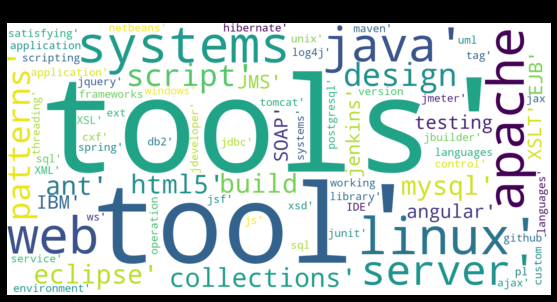

In [286]:
candidate_names=[name[2:-2] for name in df_before['NAME']]
print(f'Available candidate names :{candidate_names}')

print('==================================')
print('  No.    Candidate Names')
print('==================================')
for idx,name in enumerate(candidate_names):
    print(f'{idx+1:3}.  -  {name:10}')
    
try:
    search_no=int(input('\nEnter the No. of the candidate you want to visualize skills >> '))
except:
    print('Invalid input!')

if search_no>=1 and search_no<=len(candidate_names):
    #Retrieve candidate records if the search_no is valid
    record=df.iloc[search_no-1]
    print('\n=================================================')
    print(record['NAME'][2:-2],"'s skills visualization'")
    print('=================================================')
    wordcloud(record['SKILLS'])